Based on the article:
    
**David A. Freedman (1983)<br> A Note on Screening Regression
Equations<br>The American Statistician, 37:2, 152-155**

To link to this article: http://dx.doi.org/10.1080/00031305.1983.10482729

Abstract from the paper:
    
*Consider developing a regression model in a context where substantive theory is weak. To focus on an extreme case, suppose that in fact there is no relationship between the dependent variable and the explanatory variables. Even so, if there are many explanatory variables, the R 2 will be high. If explanatory variables with small t statistics are dropped and the equation refitted, the R 2 will stay high and the overall F will become highly significant. This is demonstrated by simulation and by asymptotic calculation.*

In [1]:
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
clr = 'color: green'

<font style='color: #76448A; font-size:120%;'>

# Paradoxes in data science
# The Freedman Paradox and the feature elimination menace

</font>

<font style='color: #76448A; font-size:120%;'>

Headline:
    
**Feature elimination is a common practice in data science, however, it entails hidden dangers that you must be aware of.**
</font>

<font style='color: #76448A; font-size:120%;'>
Behind the marvels of artificial intelligence that permeate the modern world (and the future, surely) there is a collection of algorithms and practices that constitutes the building blocks of many applications. In many cases the misuse of these procedures can lead, though, to the wrong conclusions. One of those practices is the elimination of features that are determined to be less or no useful for the task at hand.
    
</font>

<font style='color: #76448A; font-size:120%;'>
Most modern implementations of supervised machine learning involve a large number of variables. One of these variables is especial, the one that is expected to be missing in a new dataset and that could be obtained from a model using the rest of variables. This is called the target variable.  The other variables are usually called explanatory variables, as they "explain" the predicted value of the target variable. But not all variables have the same capability for explaining the target variable. So it is a common practice to perform some procedure that reduces the dimensionality of the dataset, thus gaining control over the perils of the curse of dimensionality. Feature elimination is one of the approaches to reduce dimensionality. It consists on eliminating features on the basis of their correlation with the target variable. That is, after computing the correlation of each variable with the target variable, keep only those with the highest correlation, which are the ones that better explain the target variable. The advantage of reducing the dimensionality comes from the fact that many machine learning algorithms underperform in high dimensions.
    
</font>

<font style='color: #76448A; font-size:120%;'>
The trap here is that if one looks for those correlations vehemently enough, one will eventually find them. In a paper by David Freedman from 1983, this phenomenon was formalized with both statistical and simulation approaches. Let's see how it works following the ideas of Freedman.
    
</font>

<font style='color: #76448A; font-size:120%;'>
The correlation between variables can be computed through several metrics. For two variables, the Pearson's correlation coefficient (r^2) is commonly used, which is the covariance normalized by the standard deviations of the two variables.  For more than two variables, an equivalent definition involves a matrix. Alternatively, the coefficient of determination R^2 is used as a scalar metric in multivariate problems. It is defined in terms of the squared sum of the residuals between the actual and the predicted values of the target variable. It is worth noticing that this definition is model dependent, so it is a measure of the correlation of all features with the target variable through the model.
    
</font>

<font style='color: #76448A; font-size:120%;'>
When the correlation is high, the R^2 coefficient will be close to one. A regressor model tha gives a result independent of the explaining variables will be close to zero, and it can even be negative for a bad regressor.
</font>

Set parameters

In [3]:
Nsamples = 100
Nfeatures = 50
Nselected = 10

### <font color='red'>TASK: Define a metric for multivariate correlation</font>

In [4]:
def get_corr(X, y):
    # multivariate correlation
    model = LinearRegression()
    model.fit(X, y)
    r = model.score(X, y)
    return r

In [248]:
def get_corrs(X, y):
    # list of all correlation coefficients
    Nfeats = X.shape[1]
    r = np.zeros([Nfeats, 3])
    for i in range(Nfeats):
        coef_det(y, y_pred)
        r[i, 0] = metrics.r2_score(X[:, i], y)
        r[i, 1] = np.correlate(X[:, i], y)/np.linalg.norm(y)
        r[i, 2] = np.corrcoef(X[:, i], y)
    return r

In [105]:
def gen_var(Nsample, Nfeatures):
    # draw variables from a standard normal distribution
    X = st.norm().rvs(size=(Nsamples, Nfeatures))
    y = st.norm().rvs(size=Nsamples)
    return X, y

In [106]:
def gen_var_corr(Nsample, Nfeatures, factors=(4, 9), noise=10):
    X = st.norm().rvs(size=(Nsamples, Nfeatures))
    fact = np.random.randint(0, 20, Nfeatures)
    yc = X@fact
    yc = yc + np.random.normal(loc=0, scale=10, size=Nsamples)    
    return X, yc

In [107]:
def coef_det(y_true, y_pred):
    u = ((y_true - y_pred)** 2).sum()
    v = ((y_true - y_true.mean()) ** 2).sum()
    c = 1 - u/v
    return c

Generate a fake correlation

In [9]:
X = np.random.random((Nsamples, Nfeatures))

In [10]:
fact = np.random.randint(0, 20, Nfeatures)
yc = X@fact
yc = yc + np.random.normal(loc=0, scale=10, size=Nsamples)
#yc = yc.reshape([-1, 1])

In [11]:
get_corr(X, yc)

0.9027481192083738

In [12]:
get_corrs(X, yc)[:,0]

array([-447999.95787298, -452395.84056692, -494286.40313341,
       -420329.94137971, -489168.6757429 , -687387.31523895,
       -505826.96177064, -575341.36604772, -485410.55158405,
       -500674.10368312, -508211.38996898, -555582.44769306,
       -501883.79277186, -481972.12283378, -508614.79958567,
       -505117.2679717 , -446885.56712725, -484223.7761312 ,
       -567871.51639179, -522554.02853481, -478785.60127029,
       -494163.26796851, -513593.72743623, -533404.18765379,
       -459420.90177901, -444286.18672397, -560529.80696843,
       -446348.44276858, -416053.31499122, -509692.2494424 ,
       -496620.72874457, -504492.74537795, -498704.12981971,
       -510525.42894333, -439206.39797883, -474333.19441482,
       -451094.78942179, -468261.49211166, -549449.02287012,
       -563396.31748497, -522661.98622397, -446218.03563372,
       -527537.78339961, -464452.33370312, -568596.72430976,
       -484683.97570668, -595209.06700039, -441150.42946299,
       -519394.36666838,

In [13]:
get_corrs(X, yc)[:,1]

array([4.92153139, 4.75196489, 4.50925742, 5.20521277, 5.20084402,
       4.95013972, 5.20791553, 5.02863052, 4.88232615, 5.23025061,
       4.55418832, 4.8165707 , 5.39558921, 4.945514  , 4.86138246,
       4.93298506, 5.31350368, 5.10028563, 4.86496185, 4.86550805,
       4.7382711 , 4.91065206, 4.87979739, 4.99330131, 5.19257783,
       4.71029925, 4.26074849, 4.59055994, 5.49801241, 5.25893122,
       5.12768577, 5.19398852, 5.0473245 , 4.73647459, 4.97662558,
       5.21390049, 4.79615007, 4.62770772, 5.29323534, 4.49815947,
       5.00255657, 4.7702513 , 5.00263964, 5.12894018, 4.6081576 ,
       4.69541226, 4.86742244, 5.40974907, 4.83525642, 5.00992332])

### <font color='red'>TASK: test correlation metric</font>

**1.- Correlation values for a highly correlated target variable**

In [14]:
X = np.random.random((Nsamples, Nfeatures))
fact = np.random.randint(-50, 50, Nfeatures)
yc = X@fact
yc = yc + np.random.normal(loc=0, scale=1, size=Nsamples)

In [15]:
model = LinearRegression()
model.fit(X, yc)
print(coef_det(model.predict(X), yc))

0.9998080524774554


In [16]:
c = []
ymin = 999
ymax = -999
for _ in range(1000):
    X = np.random.random((Nsamples, Nfeatures))
    fact = np.random.randint(-10, 10, Nfeatures)
    yc = X@fact
    ymin = min(ymin, min(yc))
    ymax = max(ymax, max(yc))
    yc = yc + np.random.normal(loc=0, scale=2, size=Nsamples)

    model.fit(X, yc)
    cc = coef_det(model.predict(X), yc)
    c.append(cc)

In [17]:
print(ymin, ymax)

-119.80756482445126 82.04088040920215


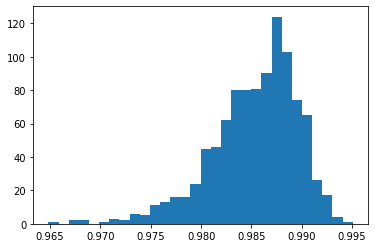

In [18]:
n, b, p = plt.hist(c, bins=30)

**2.- Correlation values for independent variable**

In [19]:
X = np.random.random((Nsamples, Nfeatures))
yc = np.random.random((Nsamples, 1))

In [20]:
get_corr(X, yc)

0.5069706770006859

In [21]:
c = []
for _ in range(1000):
    X = np.random.random((Nsamples, Nfeatures))
    yc = np.random.random((Nsamples, 1))
    c.append(get_corr(X, yc))

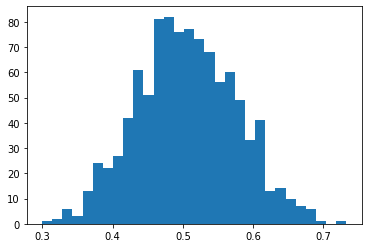

In [22]:
n, b, p = plt.hist(c, bins=30)

**3.- Ignore the features**

In [23]:
X = np.random.random((Nsamples, Nfeatures))
fact = np.random.randint(-50, 50, Nfeatures)
yc = X@fact
yc = yc + np.random.normal(loc=0, scale=1, size=Nsamples)

In [24]:
model.fit(X, yc)
cc = coef_det(yc, np.repeat(1, len(yc)))
print(cc)

-8.13659763862557


In [25]:
c = []
for _ in range(1000):    
    X = np.random.random((Nsamples, Nfeatures))
    fact = np.random.randint(-50, 50, Nfeatures)
    yc = X@fact
    yc = yc + np.random.normal(loc=0, scale=1, size=Nsamples)
    cc = coef_det(yc, np.repeat(0, len(yc)))
    c.append(cc)

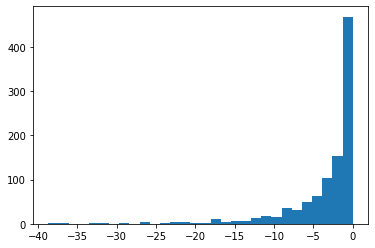

In [26]:
n, b, p = plt.hist(c, bins=30)

### <font color='red'>TASK: given a set of explanatory variables, find their predictive power by eliminating the less correlated variables. Test this exercise on random variables.</font>

In [56]:
# generate random variables

X, y = gen_var(Nsamples, Nfeatures)

**Test 2 options for correlations**

In [57]:
c = get_corrs(X, y)

In [58]:
c

array([[-6.20264313e+03, -1.15116463e+00],
       [-6.58339926e+03, -5.39827421e-01],
       [-5.75045886e+03, -1.46656122e+00],
       [-4.58469267e+03, -2.17195363e+00],
       [-6.10045897e+03,  1.49759500e+00],
       [-6.15926865e+03, -1.67014637e+00],
       [-5.27882381e+03,  1.40612207e+00],
       [-5.07604212e+03,  7.01575277e-01],
       [-5.34493974e+03, -4.59171395e-01],
       [-5.51832304e+03, -2.49741178e-01],
       [-4.64981657e+03, -2.99174597e-01],
       [-5.54531261e+03,  2.86033355e+00],
       [-5.82539565e+03,  1.23886925e+00],
       [-5.91745206e+03, -6.40940062e-01],
       [-5.06281880e+03,  1.31264067e-01],
       [-6.84573779e+03, -5.06780428e-02],
       [-4.38131240e+03,  1.29626047e+00],
       [-6.10777510e+03, -1.63119726e+00],
       [-4.51400934e+03,  9.93659765e-01],
       [-7.61166083e+03, -1.95301618e-01],
       [-6.05054278e+03,  9.09785415e-01],
       [-5.03683357e+03, -2.93560314e-01],
       [-5.94652822e+03, -8.28208798e-01],
       [-6.

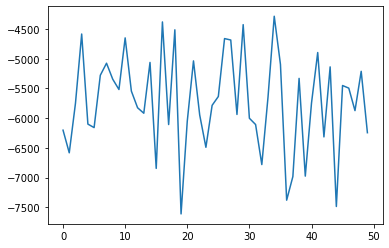

In [64]:
plt.plot(c[:, 0])

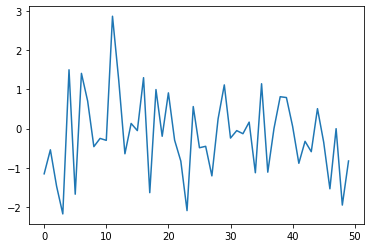

In [65]:
plt.plot(c[:, 1])

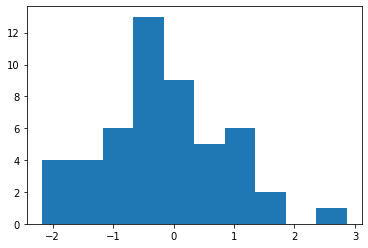

In [66]:
n, b, p = plt.hist(c[:,1])

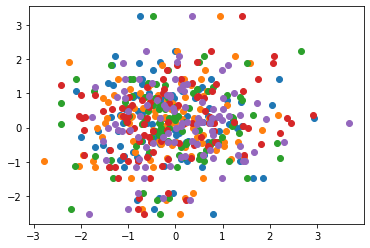

In [67]:
for i in range(5):
    plt.scatter(X[:, i], y)

In [68]:
r2s = c[:,0]
r2s = np.array(r2s)

(-3.0, 3.0)

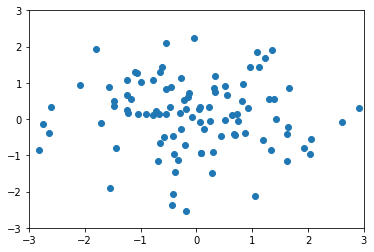

In [69]:
# Most correlated variable

plt.scatter(X[:, r2s.argmax()], y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

(-3.0, 3.0)

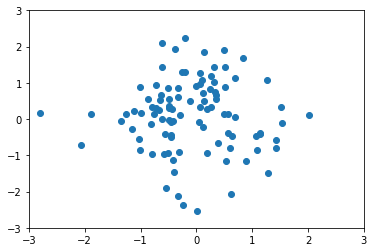

In [71]:
# Less correlated variable

plt.scatter(X[:, r2s.argmin()], y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

<br><br>
**This is mode noticeable when the sample to feature ratio is lesser**

In [134]:
# generate random variables

Nsamples = 100
Nfeatures = 500

X, y = gen_var(Nsamples, Nfeatures)

In [135]:
X.shape

(100, 500)

Test 2 options for correlations

In [136]:
c = get_corrs(X, y)

In [137]:
c.shape

(100, 2)

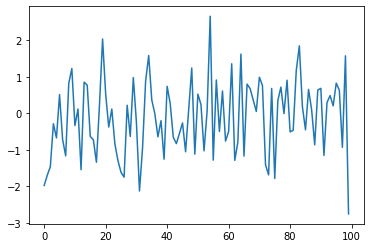

In [138]:
plt.plot(c[:, 1])

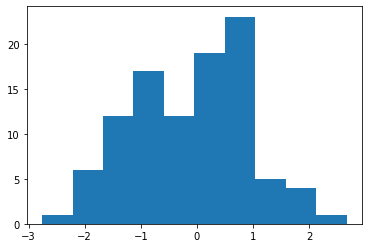

In [139]:
n, b, p = plt.hist(c[:,1])

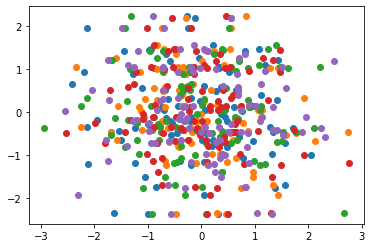

In [140]:
for i in range(5):
    plt.scatter(X[:, i], y)

In [141]:
r2s = c[:,1]
r2s = np.array(r2s)

In [142]:
print(r2s[r2s.argmin()], r2s[r2s.argmax()])

-2.757473186864992 2.6636871483307116


(-3.0, 3.0)

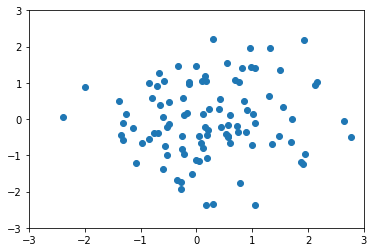

In [143]:
# Most correlated variable

plt.scatter(X[:, r2s.argmax()], y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

(-3.0, 3.0)

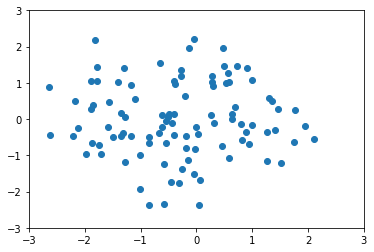

In [144]:
# Less correlated variable

plt.scatter(X[:, r2s.argmin()], y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

### <font color='red'>TASK: Compute the correlation coefficient and analyze if it improves through feature elimination</font>

Let's explore whats happens for different datasets and the corresponding subtest with feature elimination

In [223]:
# Generate random variables

In [264]:
Nsamples = 500
Nfeatures = 200

X, y = gen_var(Nsamples, Nfeatures)

model.fit(X, y)
c = get_corrs(X, y)

In [265]:
R2_full = coef_det(model.predict(X), y)
print(R2_full)

ids = c[:,1].argsort()[:25]
R2_subset = get_corr(X[:, ids], y)

print(R2_subset)

-0.2848215933691576
0.13082127049008396


In [266]:
Nexperiments = 100
R2s_full = []
R2s_subsets = []
for i in range(Nexperiments):

    X, y = gen_var(Nsamples, Nfeatures)
    model.fit(X, y)
    c = get_corrs(X, y)
    R2_full = coef_det(model.predict(X), y)
    ids = c[:,1].argsort()[:25]
    R2_subset = get_corr(X[:, ids], y)

    R2s_full.append(R2_full)
    R2s_subsets.append(R2_subset)

In [267]:
print(np.min(R2s_full), np.max(R2s_full))
print(np.min(R2s_subsets), np.max(R2s_subsets))

-1.0727353581515402 -0.06381326039118806
0.07986141802880287 0.18913198733296377


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 88., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
        -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
         0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
         0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ]),
 [<matplotlib.patches.Polygon at 0x7f424b29b760>])

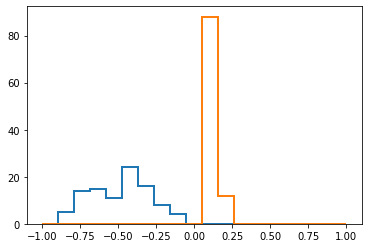

In [268]:
bins = np.linspace(-1, 1, 20)
props = {'histtype': 'step', 'linewidth': 2}
plt.hist(R2s_full, bins=bins, **props)
plt.hist(R2s_subsets, bins=bins, **props)

Let's try a more extreme setup:

In [270]:
Nsamples = 500
Nfeatures = 400

X, y = gen_var(Nsamples, Nfeatures)
model.fit(X, y)
c = get_corrs(X, y)

In [271]:
R2_full = coef_det(model.predict(X), y)
print(R2_full)

ids = c[:,1].argsort()[:25]
R2_subset = get_corr(X[:, ids], y)

print(R2_subset)

0.7768254199858426
0.19233299430488415


In [273]:
Nexperiments = 1000
R2s_full = []
R2s_subsets = []
for i in range(Nexperiments):

    X, y = gen_var(Nsamples, Nfeatures)
    model.fit(X, y)
    c = get_corrs(X, y)
    R2_full = coef_det(model.predict(X), y)
    ids = c[:,1].argsort()[:25]
    R2_subset = get_corr(X[:, ids], y)

    R2s_full.append(R2_full)
    R2s_subsets.append(R2_subset)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 61., 26.,
         5.,  0.,  0.,  0.,  0.,  0.]),
 array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
        -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
         0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
         0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ]),
 [<matplotlib.patches.Polygon at 0x7f424c537f10>])

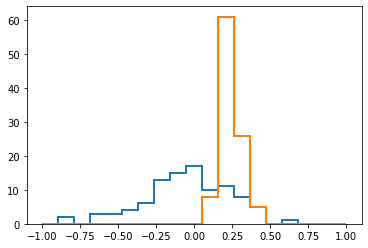

In [240]:
bins = np.linspace(-1, 1, 20)
props = {'histtype': 'step', 'linewidth': 2}
plt.hist(R2s_full, bins=bins, **props)
plt.hist(R2s_subsets, bins=bins, **props)

https://stackoverflow.com/questions/42033720/python-sklearn-multiple-linear-regression-display-r-squared

Resources:

https://stats.stackexchange.com/questions/351200/multiple-correlation-coefficient-with-three-or-more-independent-variables

- The Advanced Theory of Statistics (vol 1) by Kendall
- An Introduction to the Theory of Statistics by Yule/Kendall.
- Mathematics of Statistics (part two) by Kenney.
- Linear Statistical Inference and Its Applications by Rao (2nd ed., page 266-268).

<font style='color: #76448A; font-size:120%;'>
The key here is that, in the words of Freedman, we are considering 'a regression model in a context where substantive theory is weak'. That is, there are no strong reasons to propose a given model. For any model, then, which is not motivated by first principles or by experience in the business, there is not a solid benchmark to test its performance. The abundance of data can supply the lack of theory, unless there is not enough data either. When the samples to features ratio is low, there is plenty of room to play with the features and the results can easily be bended by picking the right subset of features.  This is a bad thing, but eliminating features without knowing these dangers, is certainly bad also.
    
</font>